In [3]:
import time
import json
import pprint as pp

from IPython.display import display, Markdown, Latex
#display(Markdown('*some markdown* $\phi$'))

import pandas as pd
from IPython.display import display, HTML

from shapely.geometry import box
import shapely.geometry

from gbdxtools import Interface
gbdx = Interface()

from gbdxtools.task import env
from gbdxtools import CatalogImage, WV03_VNIR, WV03_SWIR  

%matplotlib inline

Table of supplied 2016 bloom locations:

In [3]:
blooms = pd.read_csv("blooms.csv")
display(blooms)

date      long      lat
0   19/06/2012  150.2514 -35.6716
1   19/06/2012  150.1901 -35.8153
2   19/06/2012  150.1024 -35.8516
3   15/07/2012  150.3483 -35.4806
4   15/07/2012  150.3568 -35.5109
5   15/07/2012  150.3678 -35.5426
6   15/07/2012  150.2766 -35.6692
7   15/07/2012  150.2566 -35.6996
8   15/07/2012  150.1909 -35.7705
9   14/08/2012  150.2998 -35.4420
10  14/08/2012  150.2780 -35.6582
11  14/08/2012  150.2716 -35.6856

In [5]:
# Convex hull of the blooms:
wkt_string="POLYGON((150.1024 -35.8516,150.1024 -35.8516,150.1024 -35.442,150.3678 -35.442,150.36556264648436 -35.84991010339879,150.1024 -35.8516))"
types = [ "DigitalGlobeAcquisition" ]

cresults = gbdx.catalog.search(searchAreaWkt=wkt_string,
                          startDate="2016-08-20T00:00:00.000Z",
                          endDate="2018-08-20T00:00:00.000Z",
                          types=types)

len(cresults)

102

In [6]:
v =pd.io.json.json_normalize(cresults)

In [24]:
# 104001003C24AF00 2018-05-07 https://api.discover.digitalglobe.com/show?id=104001003C24AF00
# 104001001D14E600 2016-06-22 https://api.discover.digitalglobe.com/show?id=104001001D14E600
cat_ids = ['104001003C24AF00', '104001001D14E600']
order_id = gbdx.ordering.order(cat_ids)
print(order_id)

370d95be-6914-4941-8839-446a91efc48d


In [27]:
order_status = gbdx.ordering.status('370d95be-6914-4941-8839-446a91efc48d')
pp.pprint(order_status)

[{'acquisition_id': '104001001D14E600',
  'location': 's3://receiving-dgcs-tdgplatform-com/058344025010_01_003',
  'state': 'delivered'},
 {'acquisition_id': '104001003C24AF00',
  'location': 's3://receiving-dgcs-tdgplatform-com/058344026010_01_003',
  'state': 'delivered'}]


In [28]:
CatalogImage('104001003C24AF00').bounds

(150.15206888, -35.84786418900827, 150.30434367338844, -35.6561486931405)

In [29]:
CatalogImage('104001001D14E600').bounds

(150.10016943, -35.98236684970535, 150.25126815439813, -35.63326031)

In [31]:
a = box(150.15206888, -35.84786418900827, 150.30434367338844, -35.6561486931405)
b = box(150.10016943, -35.98236684970535, 150.25126815439813, -35.63326031)
# The intersection of the bounding boxes:
print(a.intersection(b).bounds)

(150.15206888, -35.84786418900827, 150.25126815439813, -35.6561486931405)


In [7]:
bb = [150.15206888, -35.84786418900827, 150.25126815439813, -35.6561486931405]
bay2018 = CatalogImage('104001003C24AF00', bbox=bb) # 2018-5-7
bay2016 = CatalogImage('104001001D14E600', bbox=bb) # 2016-06-22

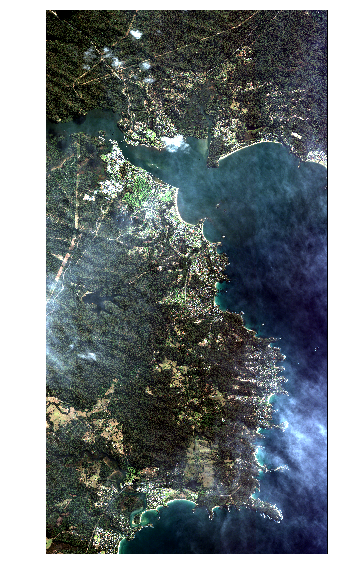

In [34]:
bay2016.plot()

As above, but with atmospheric compensation:

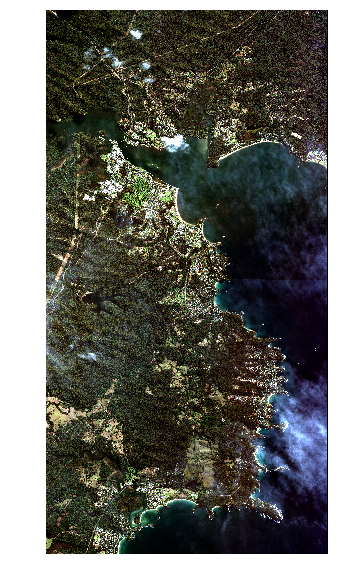

In [43]:
bay2016_acomp = CatalogImage('104001001D14E600', bbox=bb, acomp=True)
bay2016_acomp.plot()

In 2018:

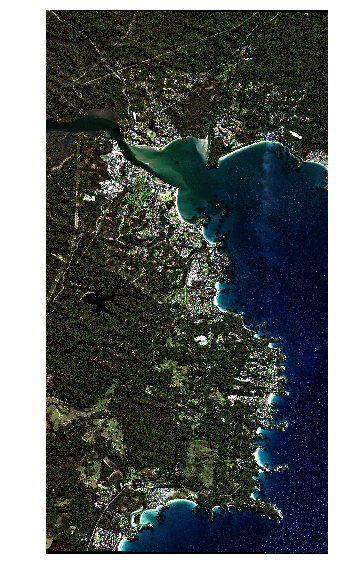

In [6]:
bay2018_acomp = CatalogImage('104001003C24AF00', bbox=bb, acomp=True)
bay2018_acomp.plot()

Closing in on location of first bloom location present in 2016 and 2018 images:

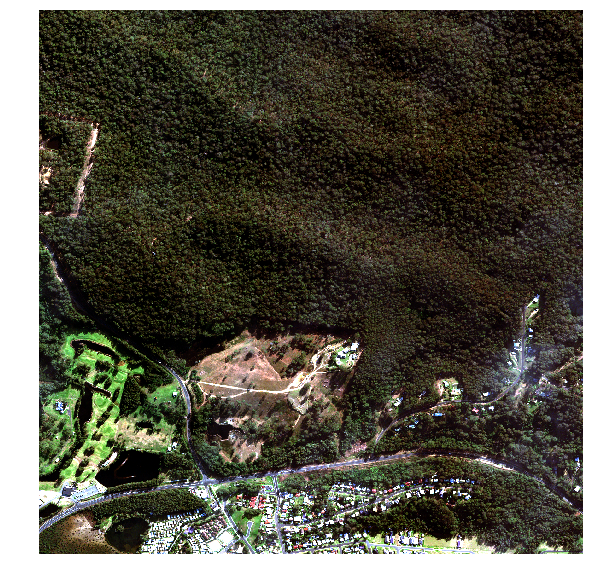

In [52]:
x = blooms.iloc[1]
bloom1 = Point(x.long,x.lat).buffer(0.01)
bloom1_aoi = bay2016_acomp.aoi(wkt=wkt.dumps(bloom1))
bloom1_aoi.plot()

Bloom location in 2016:

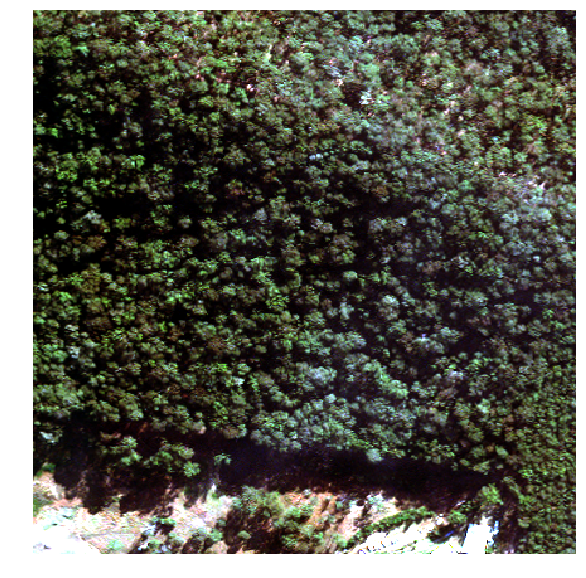

In [56]:
x = blooms.iloc[1]
bloom1 = Point(x.long,x.lat).buffer(0.0025)
bloom1_aoi = bay2016_acomp.aoi(wkt=wkt.dumps(bloom1))
bloom1_aoi.plot()

Bloom location in 2018:

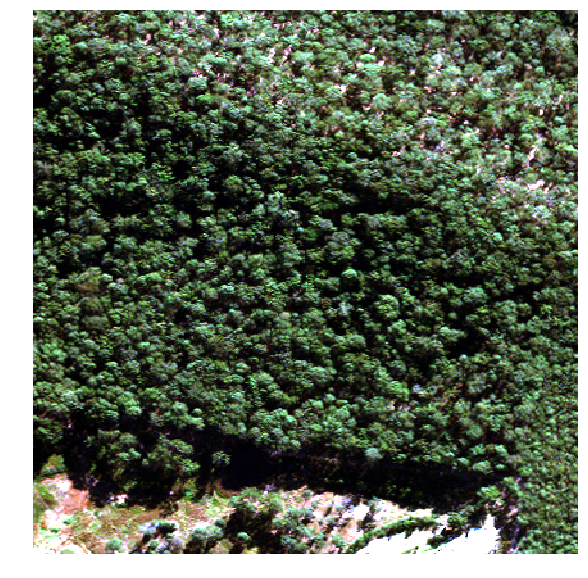

In [57]:
x = blooms.iloc[1]
bloom1 = Point(x.long,x.lat).buffer(0.0025)
bloom1_aoi = bay2018_acomp.aoi(wkt=wkt.dumps(bloom1))
bloom1_aoi.plot()

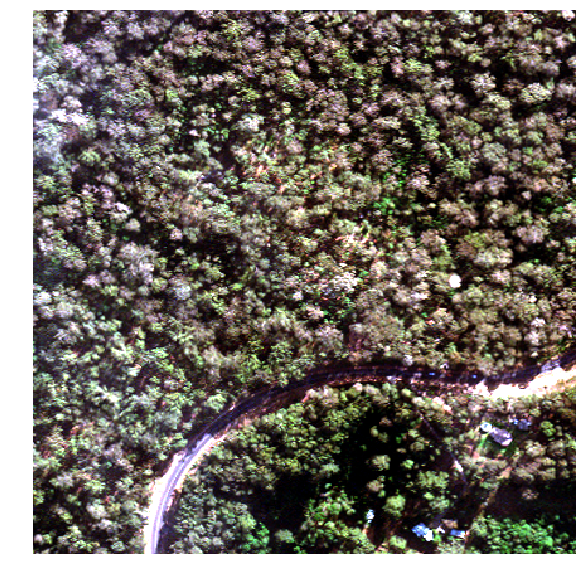

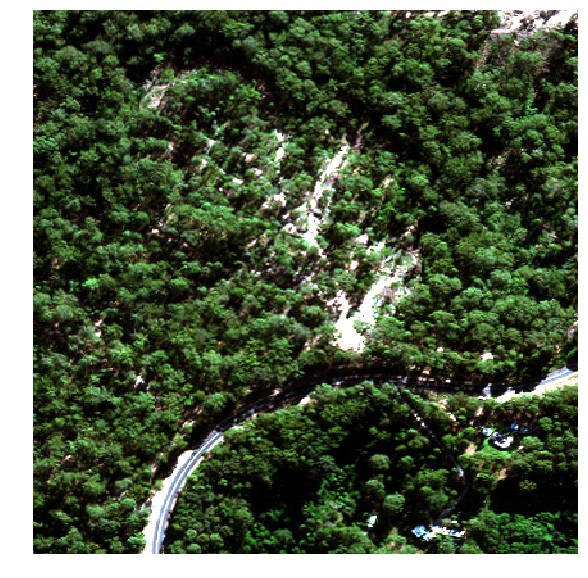

In [67]:
x = blooms.iloc[8]
bloom8 = Point(x.long,x.lat).buffer(0.0025)
bloom8_2016_aoi = bay2016_acomp.aoi(wkt=wkt.dumps(bloom8))
bloom8_2016_aoi.plot()

bloom8_2018_aoi = bay2018_acomp.aoi(wkt=wkt.dumps(bloom8))
bloom8_2018_aoi.plot()

In [ ]:
x = blooms.iloc[8]
bloom2 = Point(x.long,x.lat).buffer(0.0025)
bloom2_2016_aoi = bay2016_acomp.aoi(wkt=wkt.dumps(bloom2))
bloom2_2016_aoi.plot()

#x = blooms.iloc[2]
#bloom2 = Point(x.long,x.lat).buffer(0.0025)
bloom2_2018_aoi = bay2018_acomp.aoi(wkt=wkt.dumps(bloom2))
bloom2_2018_aoi.plot()

The following is what appears to me to be a distribution of blooming trees in the 2018 image, at a location not recorded in the 2012 bloom data.

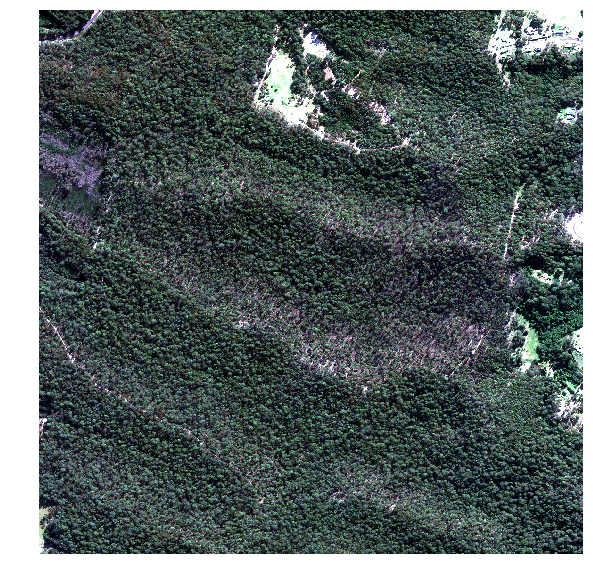

In [94]:

x = Point(150.189070,-35.797290).buffer(0.01)
e = CatalogImage('104001003C24AF00',wkt=wkt.dumps(x))
e.plot()

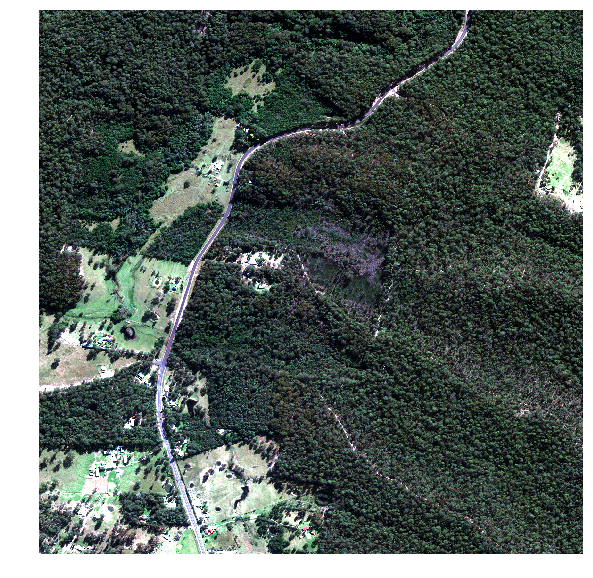

In [95]:
# Is that a bloom?  purplish?
x = Point(150.178734,-35.794054).buffer(0.01)
e = CatalogImage('104001003C24AF00',wkt=wkt.dumps(x))
e.plot()

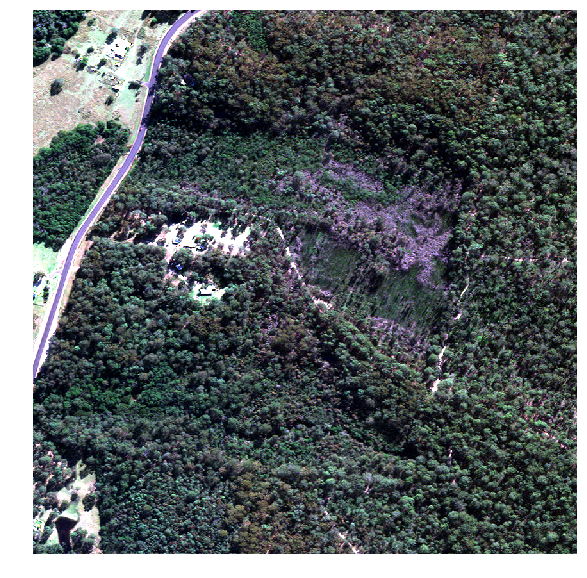

In [103]:
x = Point(150.178734,-35.794054).buffer(0.005)
e = CatalogImage('104001003C24AF00',wkt=wkt.dumps(x))
e.plot()